# Toy neural network example

We train a neural network giving for u in <0,1> a point (x,y) with coordinates 

$x = cos(2\pi u)$

$y = sin(2\pi u)$

that is, a point on a unit circle. The network will work as a random "transformer", transforming a random u in <0,1> to a random point on a unit circle. 

We trained the network in the Grid_search_cycle notebook and saved grid optimization data to a json file.

Here, we will retrieve and analyze the data.

I will show a zoo of various plot styles using matplotlib and seaborn packages. 

# Tasks:
### 1. Study the code.
There are several things that can be new:
- numpy arrays: notice how we can operate on arrays - square them, take a sine or cosine, reshape them
- pandas dataframes: notice how we can pack several arrays into a data table - a pandas DataFrame.
- matplotlib plots: notice how simply we plot things, and
- seaborn plots that add some more plotting functionality.

### 2. Analyze the data.
- Make a comprehensive package of plots and tables that we can use for other similar trainings. 


## 0. Includes

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Retrieve data

In [2]:
results = pd.read_json('../data/grid_results.json')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.349731,0.894206,0.011968,0.000814,1.000000e-07,70,"{'alpha': 1e-07, 'hidden_layer_sizes': [70, 70]}",-0.000049,-0.000042,-0.000034,-0.000041,0.000006,27,-0.000052,-0.000039,-0.000033,-0.000041,0.000008
1,4.435136,0.871565,0.014962,0.001628,1.000000e-07,80,"{'alpha': 1e-07, 'hidden_layer_sizes': [80, 80]}",-0.000042,-0.000025,-0.000018,-0.000028,0.000010,11,-0.000042,-0.000025,-0.000017,-0.000028,0.000010
10,6.121965,0.284690,0.021941,0.001410,5.000000e-07,120,"{'alpha': 5e-07, 'hidden_layer_sizes': [120, 1...",-0.000005,-0.000019,-0.000026,-0.000016,0.000009,3,-0.000005,-0.000017,-0.000025,-0.000016,0.000008
11,7.398543,0.355597,0.024933,0.000813,5.000000e-07,150,"{'alpha': 5e-07, 'hidden_layer_sizes': [150, 1...",-0.000009,-0.000009,-0.000033,-0.000017,0.000011,4,-0.000010,-0.000008,-0.000032,-0.000017,0.000011
12,5.080410,0.342166,0.012965,0.001410,1.000000e-06,70,"{'alpha': 1e-06, 'hidden_layer_sizes': [70, 70]}",-0.000036,-0.000047,-0.000039,-0.000041,0.000005,26,-0.000036,-0.000045,-0.000038,-0.000040,0.000004


## 2. Fancy table - seaborn heatmap
We just cross-tabulate and colour fields according to values.

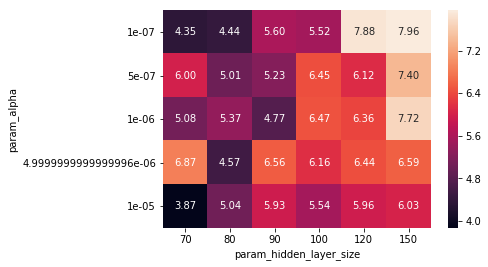

In [3]:
def make_heatmap(d, xname = 'param_hidden_layer_size', yname = 'param_alpha', valname = '', fmt = 'd'):
    '''Plot a heatmap using columns of dataframe d.'''
    table = pd.pivot_table(d, values = valname, index = yname, columns = xname, aggfunc = np.mean)
    sns.heatmap(table, annot = True, fmt = fmt)
    
make_heatmap(results, valname = 'mean_fit_time', fmt = '.2f')

This is good for non-sensitive data, such as training time. For score, we need to see standard deviations, and this we cannot do with this plot.

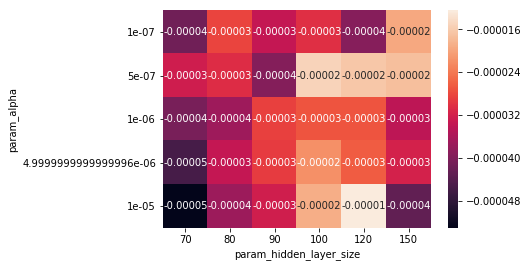

In [4]:
make_heatmap(results, valname = 'mean_test_score', fmt = '.5f')

## 3. Labelled scatterplot

Let us try something less fancy, but more useful.

In [5]:
means = ['mean_fit_time', 'mean_test_score']
stds = [s.replace('mean', 'std') for s in means]

In [6]:
results['params'] = results.apply(lambda row : 'alpha: {alpha:.1E}, sizes: {hidden_layer_sizes}'.format(**row.params), axis = 1)

In [7]:
# We sort values by mean score rank
results.sort_values(by = ['rank_test_score'], ascending = True, inplace = True)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
28,5.955743,0.193686,0.022606,0.001244,1.000000e-05,120,"alpha: 1.0E-05, sizes: [120, 120]",-0.000011,-0.000018,-0.000009,-0.000012,0.000004,1,-0.000012,-0.000017,-0.000009,-0.000013,3.490100e-06
9,6.451255,1.101040,0.018284,0.001243,5.000000e-07,100,"alpha: 5.0E-07, sizes: [100, 100]",-0.000017,-0.000016,-0.000013,-0.000015,0.000002,2,-0.000017,-0.000015,-0.000013,-0.000015,1.934400e-06
10,6.121965,0.284690,0.021941,0.001410,5.000000e-07,120,"alpha: 5.0E-07, sizes: [120, 120]",-0.000005,-0.000019,-0.000026,-0.000016,0.000009,3,-0.000005,-0.000017,-0.000025,-0.000016,8.136900e-06
11,7.398543,0.355597,0.024933,0.000813,5.000000e-07,150,"alpha: 5.0E-07, sizes: [150, 150]",-0.000009,-0.000009,-0.000033,-0.000017,0.000011,4,-0.000010,-0.000008,-0.000032,-0.000017,1.062080e-05
27,5.540186,1.084492,0.018617,0.000470,1.000000e-05,100,"alpha: 1.0E-05, sizes: [100, 100]",-0.000011,-0.000006,-0.000040,-0.000019,0.000015,5,-0.000012,-0.000006,-0.000039,-0.000019,1.449720e-05
5,7.955658,0.674414,0.032093,0.001851,1.000000e-07,150,"alpha: 1.0E-07, sizes: [150, 150]",-0.000024,-0.000023,-0.000011,-0.000019,0.000006,6,-0.000024,-0.000022,-0.000011,-0.000019,5.451900e-06
21,6.164033,1.128282,0.018616,0.001244,5.000000e-06,100,"alpha: 5.0E-06, sizes: [100, 100]",-0.000037,-0.000021,-0.000007,-0.000022,0.000012,7,-0.000038,-0.000020,-0.000007,-0.000022,1.254530e-05
22,6.440146,0.565824,0.022606,0.000471,5.000000e-06,120,"alpha: 5.0E-06, sizes: [120, 120]",-0.000010,-0.000017,-0.000053,-0.000026,0.000019,8,-0.000010,-0.000017,-0.000051,-0.000026,1.811060e-05
16,6.362648,0.724192,0.021607,0.000468,1.000000e-06,120,"alpha: 1.0E-06, sizes: [120, 120]",-0.000021,-0.000020,-0.000040,-0.000027,0.000009,9,-0.000022,-0.000020,-0.000039,-0.000027,8.320700e-06
15,6.473018,0.413587,0.018949,0.001410,1.000000e-06,100,"alpha: 1.0E-06, sizes: [100, 100]",-0.000023,-0.000035,-0.000023,-0.000027,0.000006,10,-0.000024,-0.000034,-0.000022,-0.000027,5.418100e-06


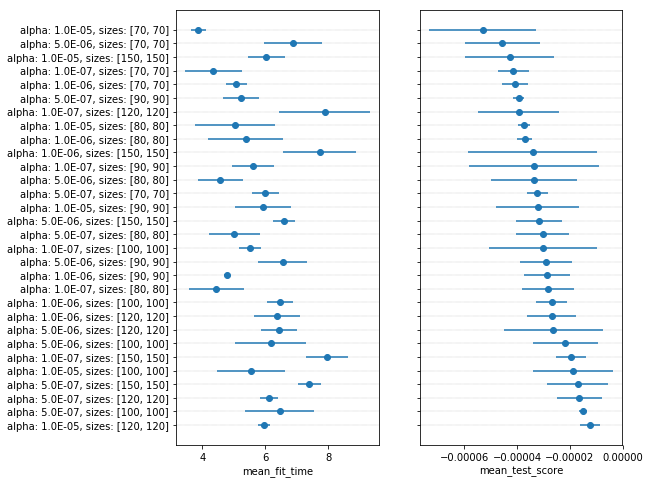

In [8]:
# Subplot frame
fig, ax = plt.subplots(nrows = 1, ncols = len(means), sharey = True, figsize = (8,8))
# Individual subplots
for subax, i in zip(ax, range(len(means))):
    xdata = results[means[i]]
    ydata = results['rank_test_score']
    xerrors = results[stds[i]]
    subax.errorbar(x = xdata, y = ydata, xerr = xerrors, fmt = 'o')
    subax.set_yticks(range(1, 1 + len(results['rank_test_score'])))
    subax.set_yticklabels(results['params'])
    subax.grid(color = 'k', linestyle = ':', linewidth = 0.2, axis = 'y')
    subax.set_xlabel(means[i])